# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
n = 5
m = 5

def bin_array(num, m):
    """Convert a positive integer num into an m-bit bit vector"""
    return np.array(list(np.binary_repr(num).zfill(m))).astype(np.int8)

In [3]:
n = 5
d = 2
S_n = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)

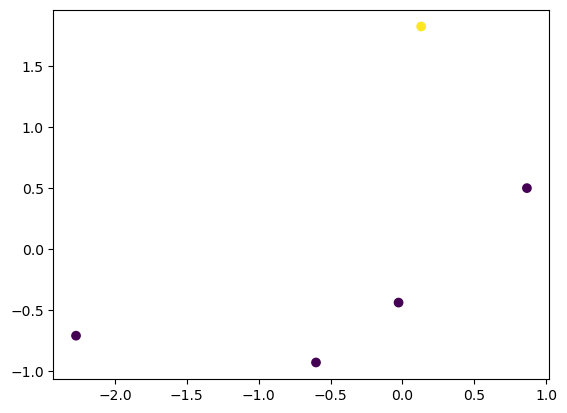

In [4]:
y = bin_array(1, n)
plt.scatter(S_n[:,0], S_n[:,1], c=y)

In [5]:
svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)

In [6]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    ret = True
    for num in range(1, 2**n-2): # we go for every binary split for 2^n because its easy
        y = bin_array(num, n)
        svc.fit(S_n, y)
        if np.abs(svc.predict(S_n) - y).sum() != 0:
            ret = False
            print(num)
            break
    return ret


In [7]:
is_shattered(2, n, S_n)

3


False

In [8]:
n = 4
d = 2
S_n = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
is_shattered(2, n, S_n)

6


False

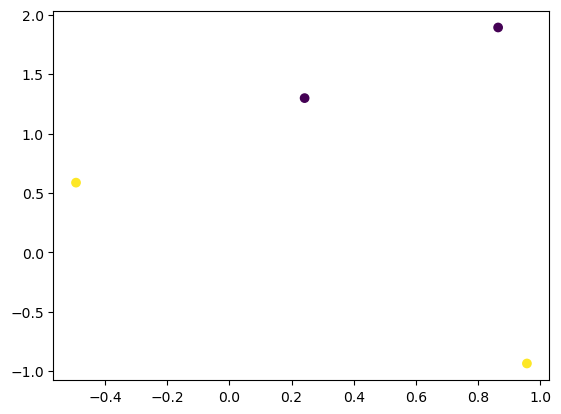

In [9]:
y = bin_array(3, n)
plt.scatter(S_n[:,0], S_n[:,1], c=y)

In [ ]:
# # useful functions to find all possible assigments of classes:
# # (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

# from itertools import combinations
# from itertools import permutations
# from itertools import product

### c)

5
False


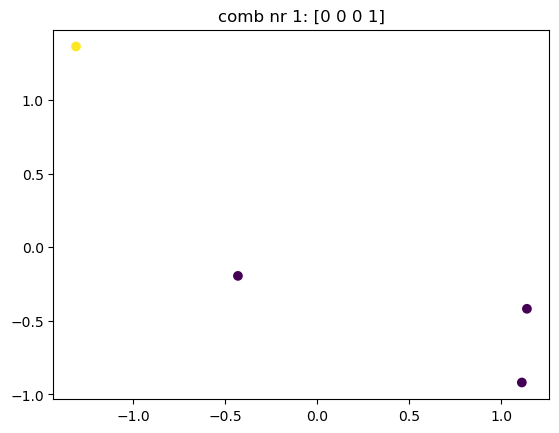

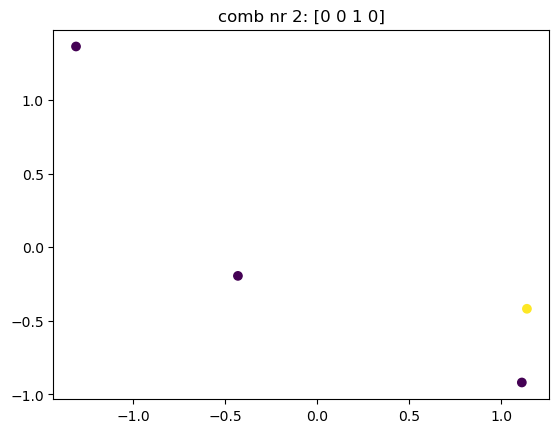

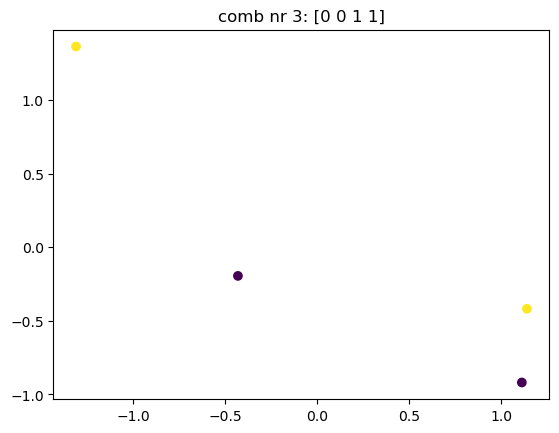

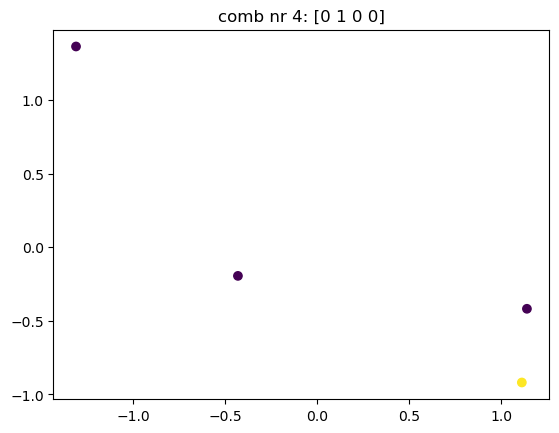

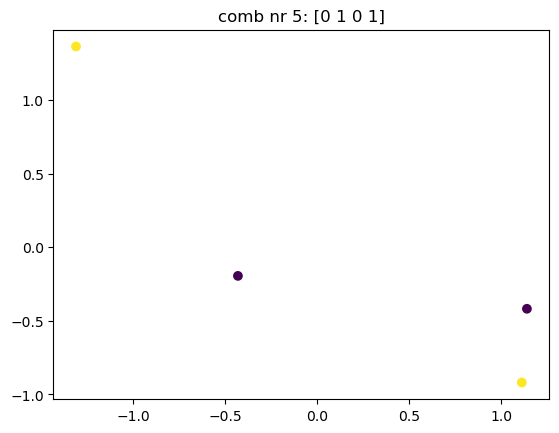

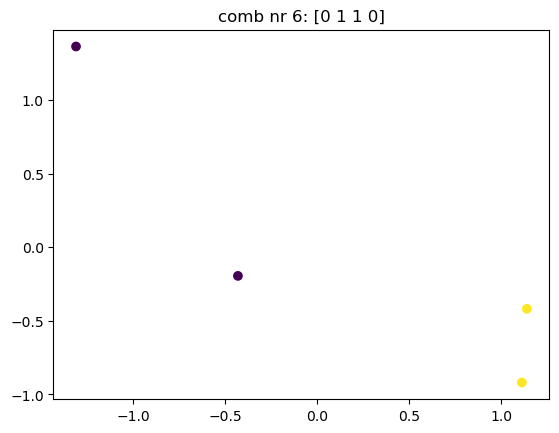

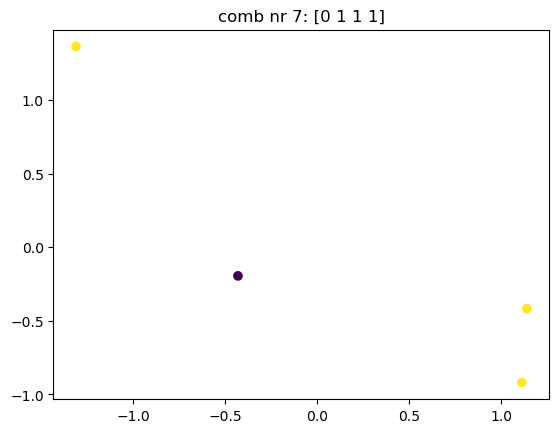

In [10]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

n = 4
d = 2
S_n = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
print(is_shattered(2, n, S_n))
for num in range(1, 8):
    y = bin_array(num, n)
    plt.scatter(S_n[:,0], S_n[:,1], c=y)
    plt.title(f"comb nr {num}: {y}")
    plt.show()

That is indeed true it is not linearly separable for case no 5.

### d)

In [12]:
# I want to fix the print here so that it doesn't spam it too much
def is_shattered(d, n, S_n):
    svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    ret = True
    for num in range(1, 2**n-2): # we go for every binary split for 2^n because its easy
        y = bin_array(num, n)
        svc.fit(S_n, y)
        if np.abs(svc.predict(S_n) - y).sum() != 0:
            ret = False
            #print(num)
            break
    return ret


In [14]:
N = 50
d_list = list(range(2, 11))
vc_dim = [None for d in d_list]


for d in d_list:
    print(f"current d: {d}")
    for n in range(2, 13): 
        shatters = False
        for i in range(N):
            S_n = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
            if is_shattered(d, n, S_n):
                shatters = True
                break
        if not shatters:
            print(f"S_{n} not shattered for d: {d}")
            vc_dim[d-2] = n
            break

current d: 2
S_4 not shattered for d: 2
current d: 3
S_5 not shattered for d: 3
current d: 4
S_6 not shattered for d: 4
current d: 5
S_7 not shattered for d: 5
current d: 6
S_8 not shattered for d: 6
current d: 7
S_9 not shattered for d: 7
current d: 8
S_10 not shattered for d: 8
current d: 9
S_11 not shattered for d: 9
current d: 10
S_12 not shattered for d: 10


Text(0, 0.5, 'VC dimension')

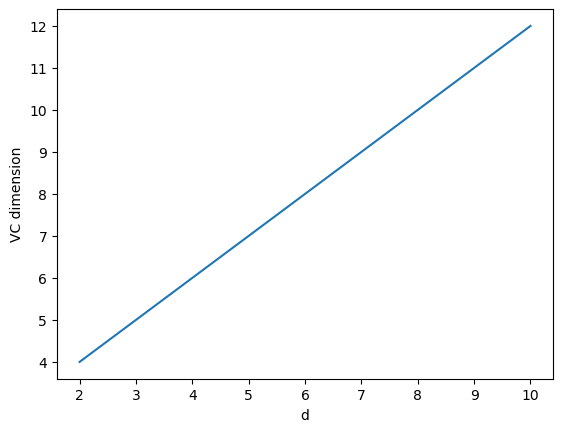

In [16]:
plt.plot(d_list, vc_dim)
plt.xlabel("d")
plt.ylabel("VC dimension")

This follows information from the lecture, because the VC dimension is equal to $d+2$.

### e)

In [ ]:
# A hint: change a kernel in SVM